In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

# 1 Load Dataset

In [2]:
data = pd.read_excel('LabeledText.xlsx')
data

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [3]:
data.isnull().sum()

File Name    0
Caption      0
LABEL        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


In [5]:
drop_neutral = data[ data['LABEL'] == 'neutral' ].index
data.drop(drop_neutral, inplace = True)


In [6]:
data.loc[data["LABEL"] == "negative", "LABEL"] = 0
data.loc[data["LABEL"] == "positive", "LABEL"] = 1


In [7]:
data['LABEL'].value_counts()


1    1646
0    1452
Name: LABEL, dtype: int64

In [8]:
data = data.astype({"LABEL": int})


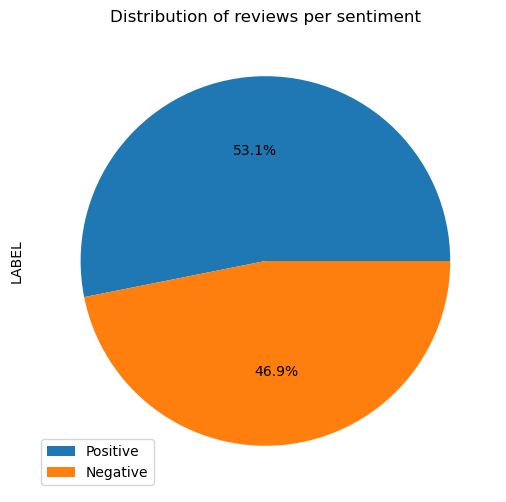

In [9]:
data['LABEL'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')


# 2 Data Pre-Processing

In [10]:
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gsawa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsawa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gsawa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gsawa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
from unidecode import unidecode

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np



In [50]:
# language detect
def lang_detect(data):
  lang = detect(data)
  return lang


In [51]:
print(data.Caption[10])
lang_detect(data.Caption[10])


Just ate four cookies. #remorse 


'en'

In [52]:
data['language']=data.Caption.apply(lang_detect)


In [53]:
data


,File Name,Caption,LABEL,language,translated_reviews,clean_data
0,1.txt,How I feel today #legday #jelly #aching #gym,0,cy,How I feel today #legday #jelly #aching #gym,feel today legday jelly aching gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,en,@ArrivaTW absolute disgrace two carriages from...,arrivatw absolute disgrace two carriage bangor...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,en,This is my Valentine's from 1 of my nephews. I...,valentine nephew elated sometimes little thing...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,en,Zoe's first love #Rattled @JohnnyHarper15,zoe first love rattled
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,en,Chaotic Love - giclee print ?65 at #art #love ...,chaotic love giclee print art love chaotic abs...
...,...,...,...,...,...,...
4862,993.txt,#Fanghorn forest or #Alder #woodland up Glen #...,0,en,#Fanghorn forest or #Alder #woodland up Glen #...,fanghorn forest alder woodland glen vorlich lo...
4863,994.txt,"Where there¡¯s a whisk, there¡¯s a way. #power...",0,en,"Where there's a whisk, there's a way. #powerle...",whisk way powerless bakersgonnabake
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,1,af,OMG. Well done #Eskom! 'Man dies during #LoadS...,omg well done eskom dy loadshedding powerless
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,1,en,Feelin' the love in here! #ValentinesDay #caring,feelin love valentinesday caring


In [17]:
data['language'].nunique()


28

In [18]:
data.language.value_counts()


en    2906
de      38
es      22
fr      18
nl      17
id      12
it      10
tl      10
ca      10
af       9
pt       7
ro       5
da       4
so       4
no       4
sv       3
cy       3
pl       3
tr       2
sw       2
sk       2
sl       1
hr       1
et       1
sq       1
vi       1
fi       1
hu       1
Name: language, dtype: int64

In [19]:
def lang_trans(data):
  translor = Translator()
  translated_text = translor.translate(data)
  return translated_text.text


In [20]:
print(data.Caption[1])
lang_trans(data.Caption[1])


@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced 


'@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced'

In [21]:
data['translated_reviews']=data.Caption.apply(lang_trans)


In [22]:
data['translated_reviews']


0            How I feel today #legday #jelly #aching #gym
1       @ArrivaTW absolute disgrace two carriages from...
2       This is my Valentine's from 1 of my nephews. I...
4               Zoe's first love #Rattled @JohnnyHarper15
5       Chaotic Love - giclee print ?65 at #art #love ...
                              ...                        
4862    #Fanghorn forest or #Alder #woodland up Glen #...
4863    Where there's a whisk, there's a way. #powerle...
4864    OMG. Well done #Eskom! 'Man dies during #LoadS...
4865     Feelin' the love in here! #ValentinesDay #caring
4868    #colorsplash_bw #zealous #herbal remedies and ...
Name: translated_reviews, Length: 3098, dtype: object

In [23]:
data


,File Name,Caption,LABEL,language,translated_reviews
0,1.txt,How I feel today #legday #jelly #aching #gym,0,en,How I feel today #legday #jelly #aching #gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,en,@ArrivaTW absolute disgrace two carriages from...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,en,This is my Valentine's from 1 of my nephews. I...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,en,Zoe's first love #Rattled @JohnnyHarper15
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,en,Chaotic Love - giclee print ?65 at #art #love ...
...,...,...,...,...,...
4862,993.txt,#Fanghorn forest or #Alder #woodland up Glen #...,0,en,#Fanghorn forest or #Alder #woodland up Glen #...
4863,994.txt,"Where there¡¯s a whisk, there¡¯s a way. #power...",0,en,"Where there's a whisk, there's a way. #powerle..."
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,1,af,OMG. Well done #Eskom! 'Man dies during #LoadS...
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,1,en,Feelin' the love in here! #ValentinesDay #caring


In [24]:
# preprocessing 
def expand_text(data):
  expanded_text = contractions.fix(data)
  return expanded_text
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
stopword_list.remove('nor')

def clean_data(data):
  tokens = word_tokenize(data)
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower()
                        not in stopword_list) and (len(word)>2) and (word.isalpha())]
  return clean_text


In [25]:
clean_text = data.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)


In [26]:
clean_text


0               [feel, today, legday, jelly, aching, gym]
1       [arrivatw, absolute, disgrace, two, carriages,...
2       [valentine, nephews, elated, sometimes, little...
4                             [zoe, first, love, rattled]
5       [chaotic, love, giclee, print, art, love, chao...
                              ...                        
4862    [fanghorn, forest, alder, woodland, glen, vorl...
4863             [whisk, way, powerless, bakersgonnabake]
4864    [omg, well, done, eskom, dies, loadshedding, p...
4865                [feelin, love, valentinesday, caring]
4868    [zealous, herbal, remedies, natural, treatment...
Name: translated_reviews, Length: 3098, dtype: object

In [31]:
# preprocessing 
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in 
                                                    stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect 
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)


In [32]:
import sys

In [54]:
clean_text_train = data.translated_reviews.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)



In [55]:
clean_text_train


0                      feel today legday jelly aching gym
1       arrivatw absolute disgrace two carriage bangor...
2       valentine nephew elated sometimes little thing...
4                                  zoe first love rattled
5       chaotic love giclee print art love chaotic abs...
                              ...                        
4862    fanghorn forest alder woodland glen vorlich lo...
4863                  whisk way powerless bakersgonnabake
4864        omg well done eskom dy loadshedding powerless
4865                     feelin love valentinesday caring
4868    zealous herbal remedy natural treatment herbal...
Name: translated_reviews, Length: 3098, dtype: object

In [56]:
data['clean_data']=clean_text_train


In [57]:
data


,File Name,Caption,LABEL,language,translated_reviews,clean_data
0,1.txt,How I feel today #legday #jelly #aching #gym,0,cy,How I feel today #legday #jelly #aching #gym,feel today legday jelly aching gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,en,@ArrivaTW absolute disgrace two carriages from...,arrivatw absolute disgrace two carriage bangor...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,en,This is my Valentine's from 1 of my nephews. I...,valentine nephew elated sometimes little thing...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,en,Zoe's first love #Rattled @JohnnyHarper15,zoe first love rattled
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,en,Chaotic Love - giclee print ?65 at #art #love ...,chaotic love giclee print art love chaotic abs...
...,...,...,...,...,...,...
4862,993.txt,#Fanghorn forest or #Alder #woodland up Glen #...,0,en,#Fanghorn forest or #Alder #woodland up Glen #...,fanghorn forest alder woodland glen vorlich lo...
4863,994.txt,"Where there¡¯s a whisk, there¡¯s a way. #power...",0,en,"Where there's a whisk, there's a way. #powerle...",whisk way powerless bakersgonnabake
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,1,af,OMG. Well done #Eskom! 'Man dies during #LoadS...,omg well done eskom dy loadshedding powerless
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,1,en,Feelin' the love in here! #ValentinesDay #caring,feelin love valentinesday caring


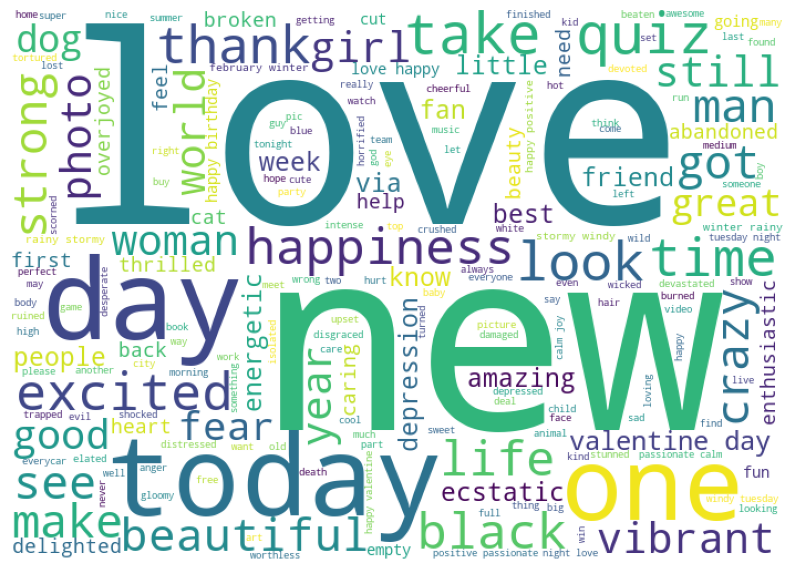

In [42]:
# Worcloud
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ') # >>>'R1 R2'
  text = ' '.join([word for word in df_.split()])#[w1,w2,w3,w4]>>' '.join >> 'w1 w2 w3'
  wordcloud = WordCloud(width=700,height=500,background_color='white').generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

wordcloud(data,'clean_data')


# 3.Text Vectorization


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(data['clean_data'])
vector = vectorizer.transform(data['clean_data'])
print(vector)


  (0, 8589)	0.27374210109549585
  (0, 4870)	0.5093840612641236
  (0, 4434)	0.4670774061658885
  (0, 3672)	0.42477075106765344
  (0, 3013)	0.33296848244259625
  (0, 52)	0.39513748949515326
  (1, 9146)	0.25577598138137114
  (1, 8817)	0.25203418624096363
  (1, 7920)	0.3050206967233116
  (1, 7126)	0.26686353960214454
  (1, 3697)	0.281841952093416
  (1, 2338)	0.2469691015854936
  (1, 2337)	0.3290861431998296
  (1, 1366)	0.3414574837983207
  (1, 667)	0.3414574837983207
  (1, 448)	0.3414574837983207
  (1, 25)	0.3290861431998296
  (2, 8948)	0.24192673047870342
  (2, 8480)	0.5675949442585773
  (2, 7763)	0.3622781652685973
  (2, 5793)	0.3731592688150027
  (2, 4989)	0.26601645424611103
  (2, 2639)	0.2782712485286473
  (2, 867)	0.3622781652685973
  (2, 824)	0.26337998534686025
  :	:
  (3093, 5012)	0.30129076428353846
  (3093, 3478)	0.2819075488637399
  (3093, 3202)	0.4913015693789716
  (3093, 2951)	0.30129076428353846
  (3093, 192)	0.2903747034531573
  (3094, 9222)	0.5553492984865719
  (3094, 9146

# 4 Split Dataset

In [59]:
from sklearn.model_selection import train_test_split
X = data['clean_data']
y = data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2)


# 5 Model Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [61]:
predictions = model.predict(X_test)


# 6 Evaluation Model

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Accuracy Score Testing :")
print(accuracy_score(y_test, predictions))

print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))

print("Classification Report : ")
print(classification_report(y_test,predictions))


Accuracy Score Testing :
0.8483870967741935
Confusion Matrix : 
[[274   9]
 [ 85 252]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       283
           1       0.97      0.75      0.84       337

    accuracy                           0.85       620
   macro avg       0.86      0.86      0.85       620
weighted avg       0.87      0.85      0.85       620



In [63]:
import pickle 
pickle.dump(vectorizer, open('tfidf.pkl', "wb"))

In [64]:
import pickle 
pickle.dump(model, open('model_rf.pkl', "wb"))